             BOROUGH    NEIGHBORHOOD  \
count   84548.000000           84548   
unique           NaN             254   
top              NaN  FLUSHING-NORTH   
freq             NaN            3068   
mean        2.998758             NaN   
min         1.000000             NaN   
25%         2.000000             NaN   
50%         3.000000             NaN   
75%         4.000000             NaN   
max         5.000000             NaN   
std         1.289790             NaN   

                            BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
count                                         84548                84548   
unique                                           47                   11   
top     01 ONE FAMILY DWELLINGS                                        1   
freq                                          18235                38633   
mean                                            NaN                  NaN   
min                                             NaN            

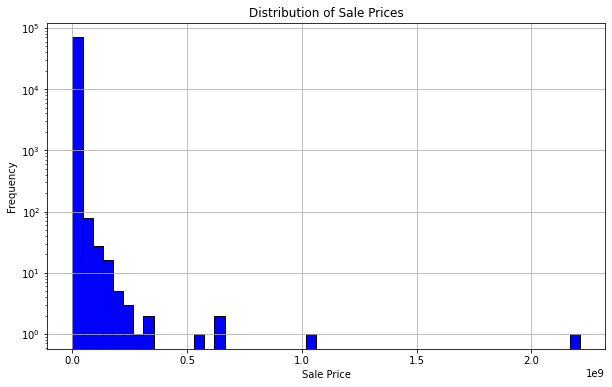

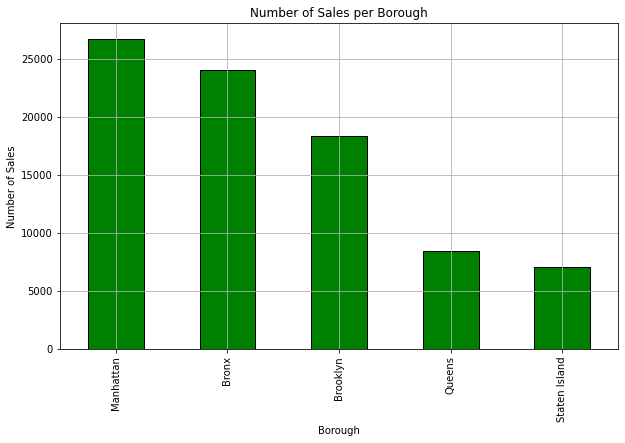

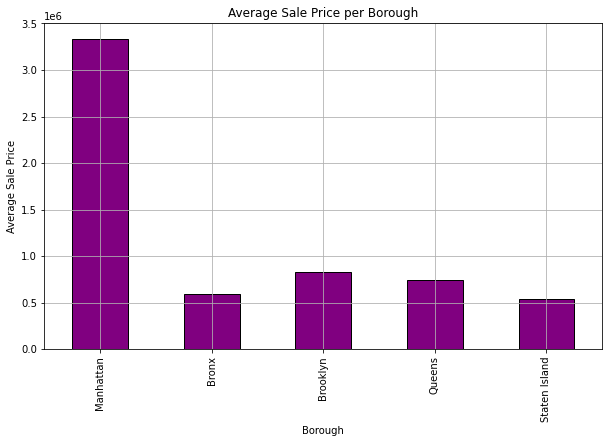

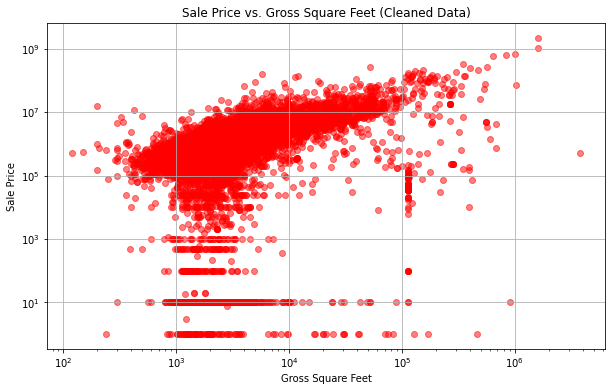

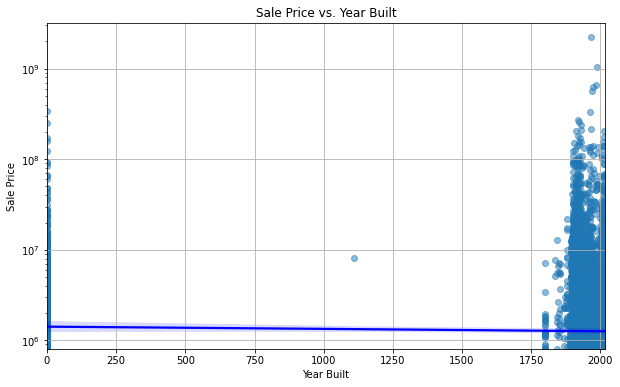

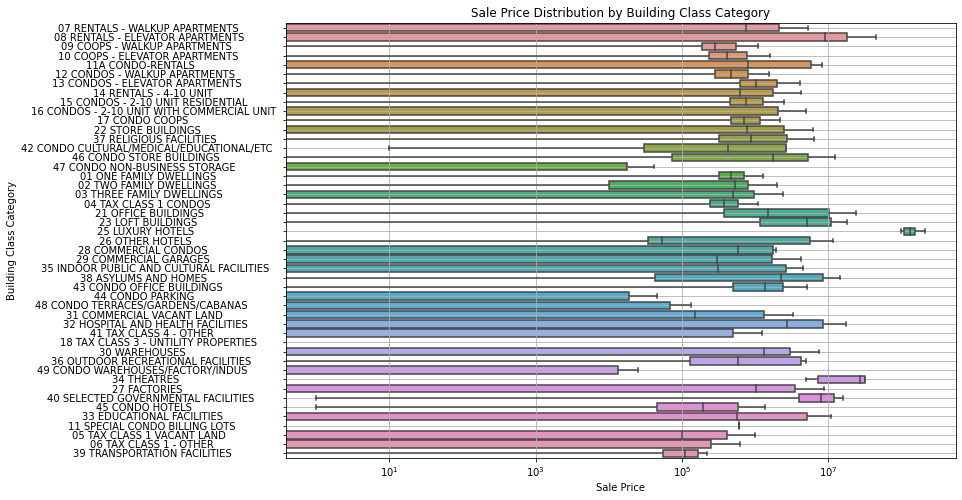

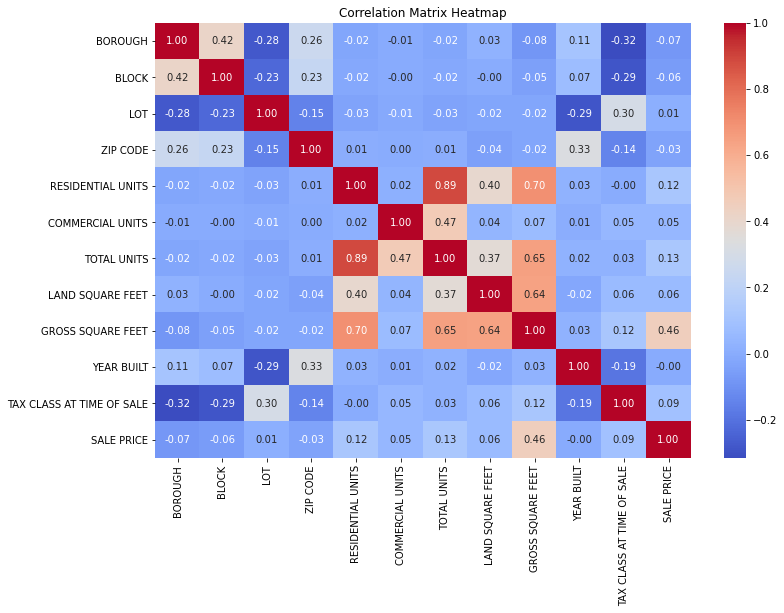

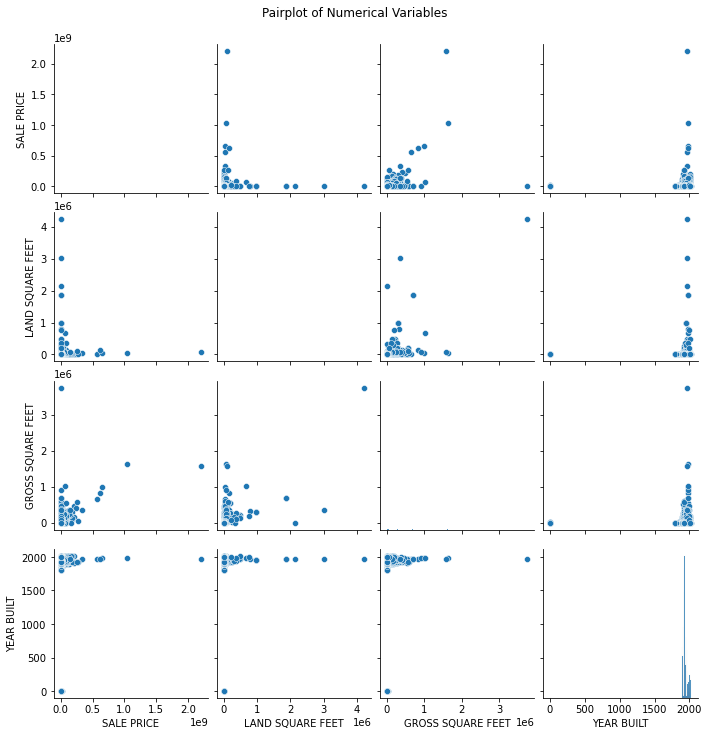

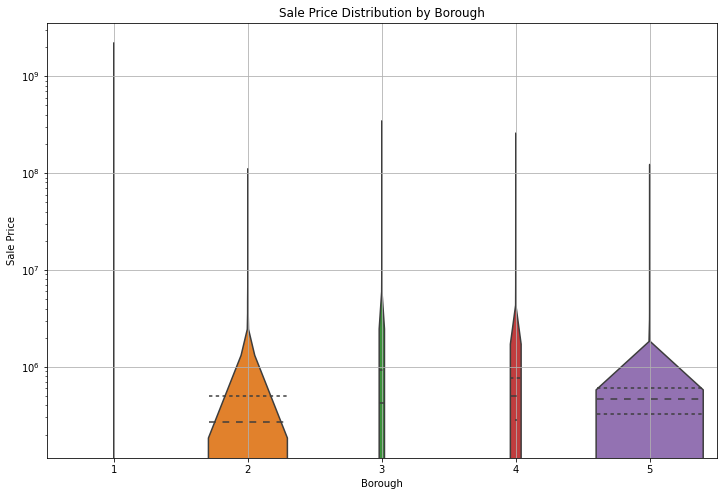

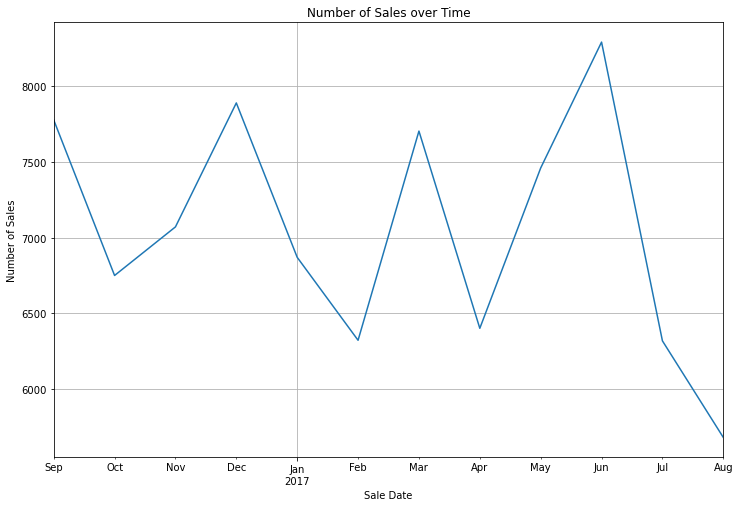

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:\\Users\\burci\\OneDrive\\Masaüstü\\Soostone Data Science Assignment\\nyc-rolling-sales.csv'
nyc_sales_df = pd.read_csv(file_path)

# Data cleaning
nyc_sales_df['SALE PRICE'] = pd.to_numeric(nyc_sales_df['SALE PRICE'], errors='coerce')
nyc_sales_df['LAND SQUARE FEET'] = pd.to_numeric(nyc_sales_df['LAND SQUARE FEET'].str.replace(',', ''), errors='coerce')
nyc_sales_df['GROSS SQUARE FEET'] = pd.to_numeric(nyc_sales_df['GROSS SQUARE FEET'].str.replace(',', ''), errors='coerce')
nyc_sales_df['SALE DATE'] = pd.to_datetime(nyc_sales_df['SALE DATE'], errors='coerce')
nyc_sales_df.drop(columns=['Unnamed: 0'], inplace=True)

# Displaying basic statistics to understand the data better
print(nyc_sales_df.describe(include='all', datetime_is_numeric=True))

# Visualizing some interesting aspects of the dataset

# 1. Distribution of Sale Prices
plt.figure(figsize=(10, 6))
plt.hist(nyc_sales_df['SALE PRICE'].dropna(), bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True)
plt.show()

# 2. Number of Sales per Borough
borough_counts = nyc_sales_df['BOROUGH'].value_counts()
borough_names = ['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island']
borough_counts.index = borough_names

plt.figure(figsize=(10, 6))
borough_counts.plot(kind='bar', color='green', edgecolor='black')
plt.title('Number of Sales per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()

# 3. Average Sale Price per Borough
average_price_per_borough = nyc_sales_df.groupby('BOROUGH')['SALE PRICE'].mean()
average_price_per_borough.index = borough_names

plt.figure(figsize=(10, 6))
average_price_per_borough.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Average Sale Price per Borough')
plt.xlabel('Borough')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.show()

# 4. Scatter Plot: Sale Price vs. Gross Square Feet (Cleaned Data)
cleaned_data = nyc_sales_df.dropna(subset=['SALE PRICE', 'GROSS SQUARE FEET'])
cleaned_data = cleaned_data[(cleaned_data['SALE PRICE'] > 0) & (cleaned_data['GROSS SQUARE FEET'] > 0)]

plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['GROSS SQUARE FEET'], cleaned_data['SALE PRICE'], alpha=0.5, color='red')
plt.title('Sale Price vs. Gross Square Feet (Cleaned Data)')
plt.xlabel('Gross Square Feet')
plt.ylabel('Sale Price')
plt.yscale('log')
plt.xscale('log')
plt.grid(True)
plt.show()

# 5. Regression Plot: Sale Price vs. Year Built
plt.figure(figsize=(10, 6))
sns.regplot(x='YEAR BUILT', y='SALE PRICE', data=nyc_sales_df, scatter_kws={'alpha':0.5}, line_kws={'color':'blue'})
plt.title('Sale Price vs. Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.yscale('log')
plt.grid(True)
plt.show()

# 6. Box Plot: Sale Price Distribution by Building Class Category
plt.figure(figsize=(12, 8))
sns.boxplot(x='SALE PRICE', y='BUILDING CLASS CATEGORY', data=nyc_sales_df, showfliers=False)
plt.title('Sale Price Distribution by Building Class Category')
plt.xlabel('Sale Price')
plt.ylabel('Building Class Category')
plt.xscale('log')
plt.grid(True)
plt.show()

# 7. Heatmap: Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = nyc_sales_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 8. Pairplot: Relationships between numerical variables
sns.pairplot(cleaned_data, vars=['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT'])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# 9. Violin Plot: Sale Price Distribution by Borough
plt.figure(figsize=(12, 8))
sns.violinplot(x='BOROUGH', y='SALE PRICE', data=nyc_sales_df, inner='quartile')
plt.title('Sale Price Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Sale Price')
plt.yscale('log')
plt.grid(True)
plt.show()

# 10. Time Series Plot: Number of Sales over Time
plt.figure(figsize=(12, 8))
sales_over_time = nyc_sales_df.resample('M', on='SALE DATE').size()
sales_over_time.plot()
plt.title('Number of Sales over Time')
plt.xlabel('Sale Date')
plt.ylabel('Number of Sales')
plt.grid(True)
plt.show()


                            OLS Regression Results                            
Dep. Variable:             SALE PRICE   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     594.8
Date:                Mon, 12 Aug 2024   Prob (F-statistic):               0.00
Time:                        00:40:49   Log-Likelihood:            -4.1927e+05
No. Observations:               23463   AIC:                         8.386e+05
Df Residuals:                   23430   BIC:                         8.389e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

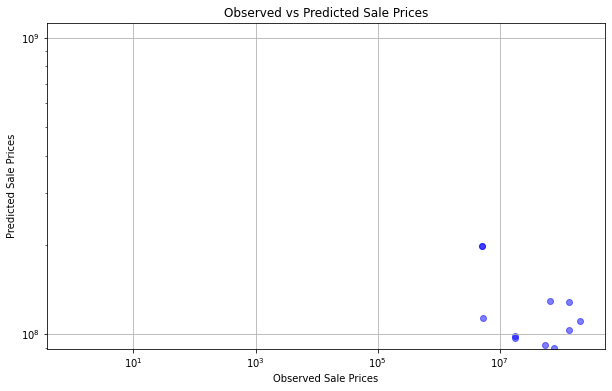

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
file_path = 'C:\\Users\\burci\\OneDrive\\Masaüstü\\Soostone Data Science Assignment\\nyc-rolling-sales.csv'
nyc_sales_df = pd.read_csv(file_path)

# Data cleaning
nyc_sales_df['SALE PRICE'] = pd.to_numeric(nyc_sales_df['SALE PRICE'], errors='coerce')
nyc_sales_df['LAND SQUARE FEET'] = pd.to_numeric(nyc_sales_df['LAND SQUARE FEET'].str.replace(',', ''), errors='coerce')
nyc_sales_df['GROSS SQUARE FEET'] = pd.to_numeric(nyc_sales_df['GROSS SQUARE FEET'].str.replace(',', ''), errors='coerce')
nyc_sales_df['SALE DATE'] = pd.to_datetime(nyc_sales_df['SALE DATE'], errors='coerce')

# Drop rows with missing or zero values in key columns
nyc_sales_df = nyc_sales_df.dropna(subset=['SALE PRICE', 'GROSS SQUARE FEET', 'LAND SQUARE FEET', 'YEAR BUILT', 'BUILDING CLASS CATEGORY'])
nyc_sales_df = nyc_sales_df[(nyc_sales_df['SALE PRICE'] > 0) & (nyc_sales_df['GROSS SQUARE FEET'] > 0) & (nyc_sales_df['LAND SQUARE FEET'] > 0)]

# One-hot encode the 'BUILDING CLASS CATEGORY' column
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categories = encoder.fit_transform(nyc_sales_df[['BUILDING CLASS CATEGORY']])
encoded_category_names = encoder.get_feature_names(['BUILDING CLASS CATEGORY'])

# Combine the encoded columns with the original dataframe
encoded_categories_df = pd.DataFrame(encoded_categories, columns=encoded_category_names)
nyc_sales_df = pd.concat([nyc_sales_df.reset_index(drop=True), encoded_categories_df.reset_index(drop=True)], axis=1)

# Define the target variable (Y) and independent variables (X)
X = nyc_sales_df[['YEAR BUILT', 'GROSS SQUARE FEET', 'LAND SQUARE FEET'] + list(encoded_categories_df.columns)]
Y = nyc_sales_df['SALE PRICE']

# Add a constant to the independent variables matrix (for intercept)
X = sm.add_constant(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build the regression model
model = sm.OLS(Y_train, X_train).fit()

# Print the model summary
print(model.summary())

# Predicting the Test set results
Y_pred = model.predict(X_test)

# Plotting the observed vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5, color='blue')
plt.title('Observed vs Predicted Sale Prices')
plt.xlabel('Observed Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()
